In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt #similar to Seaborn library
import numpy as np

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
#replaced cross_validation with model_selection
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [3]:
creditOne = pd.read_csv(r"C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task3\PreparedDataset.csv", header =0)

In [4]:
#parse columns to category. At this time we only have the columns that the RFE has define as more important for this dataset
creditOne['AGE'] = creditOne.AGE.astype('category')
creditOne['PAY_0'] = creditOne.PAY_0.astype('category')
creditOne['PayCredit'] = creditOne.PayCredit.astype('category')

In [5]:
creditOne['AGE']

0        2
1        2
2        4
3        4
4        5
        ..
29995    4
29996    5
29997    4
29998    5
29999    5
Name: AGE, Length: 30000, dtype: category
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [100]:
creditOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
LIMIT_BAL    30000 non-null int64
AGE          30000 non-null category
PAY_0        30000 non-null category
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
PayCredit    30000 non-null category
dtypes: category(3), int64(4)
memory usage: 1.0 MB


In [6]:
#features
features = creditOne.iloc[:,0:5]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2
0,20000,2,2,3913,3102
1,120000,2,-1,2682,1725
2,90000,4,0,29239,14027
3,50000,4,0,46990,48233
4,50000,5,-1,8617,5670


In [8]:
#dependent variable
depVar = creditOne['PayCredit']

In [9]:
# split data into training and test data implementing cross validation
X_train, X_test, y_train, y_test = train_test_split(features, depVar, 
                                                    train_size=0.75,
                                                    test_size=0.25,
                                                    random_state=123)

In [15]:
#check the split
X_train.shape, X_test.shape

((22500, 5), (7500, 5))

In [19]:
X_train['AGE'].value_counts()

5    6130
3    5956
4    5421
2    3789
1    1157
6      47
Name: AGE, dtype: int64

In [17]:
X_train.head()

,LIMIT_BAL,AGE,PAY_0,BILL_AMT1,BILL_AMT2
16095,140000,4,1,59379,63007
28548,210000,3,0,43047,9378
25096,20000,5,-1,13561,13050
12260,90000,1,2,37639,38743
21549,50000,1,-2,2498,-2


In [20]:
#Dependent Variable Training Set (y Training)
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22500


16095    0
28548    0
25096    1
12260    0
21549    0
Name: PayCredit, dtype: category
Categories (2, int64): [0, 1]

In [31]:
#Testing Set (X Testing)
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 7500
       LIMIT_BAL AGE PAY_0  BILL_AMT1  BILL_AMT2
25665      40000  26    -1      28991      24391
16464      80000  59     0      75662      70073
22386     170000  30     2     155910     158819
10149     200000  41    -2      23570        735
8729       50000  43     0       8214       8034


In [32]:
#Ground Truth (y_test) 
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 7500


25665    0
16464    0
22386    1
10149    1
8729     0
Name: PayCredit, dtype: category
Categories (2, int64): [0, 1]

In [35]:
#+++++++++++++++++++++++++++++First Model RFC ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Parameters: n_estimators specifies the number of trees in the forest of the model. 
#the default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
#min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. 
#The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.

clf = RandomForestClassifier(n_jobs=10, random_state=0, n_estimators = 55, min_samples_split = 35)


In [36]:
#Model Fitting
clf.fit(X_train,y_train)
rfc_cv_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')

In [23]:
#The roc_auc scoring used in the cross-validation model shows the area under the ROC curve.
print("=== All AUC Scores ===")
print(rfc_cv_score)
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

clf.score(X_train,y_train)

=== All AUC Scores ===
[0.74326    0.76096292 0.7486816  0.73513693 0.76244481 0.74322481
 0.77458519 0.7496271  0.73247273 0.73874949]
Mean AUC Score - Random Forest:  0.7489145587315933


0.8374222222222222

In [12]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Accuracy: 0.8026666666666666 - It seems to be the parameters with the best accuracy for this model

Accuracy: 0.8226666666666667


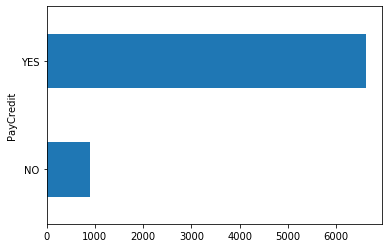

In [144]:
#Visualize the counts  for predictions
import pandas as pd
dfPredictions = pd.DataFrame(y_pred)
dfPredictions.columns = ['PayCredit']
dfPredictions["PayCredit"]=dfPredictions["PayCredit"].replace({0: "YES", 1: "NO"})
dfPredictions.groupby('PayCredit').size().plot(kind='barh')


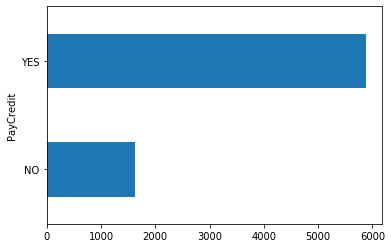

In [145]:
#Visualize the count  for y_test data
dfReal = pd.DataFrame(y_test)
dfReal.columns = ['PayCredit']
dfReal["PayCredit"]=dfReal["PayCredit"].replace({0: "YES", 1: "NO"})
dfReal.groupby('PayCredit').size().plot(kind='barh')

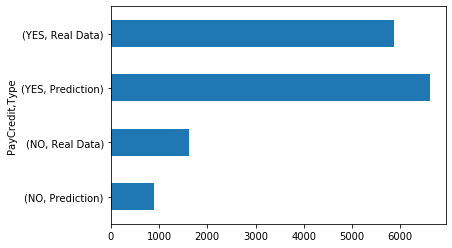

In [150]:
#Create a new column 'Type' to identify the row Type (real or predicted data)
dfReal['Type']='Real Data' 
dfPredictions['Type']='Prediction' 
dfReal.reset_index(drop=True, inplace=True)
dfPredictions.reset_index(drop=True, inplace=True)
result= pd.concat([dfReal, dfPredictions], sort=False,axis=0, join='outer', join_axes=None, ignore_index=False,
       keys=None, levels=None, names=None, verify_integrity=False)

#result.groupby(['value','Type']).size().reset_index().rename(columns={0:'count'})
#plot the data together
result.groupby(['PayCredit','Type']).size().plot(kind='barh')


In [151]:
#see the totals  in a table
result.groupby(['PayCredit','Type']).size().reset_index().rename(columns={0:'Total'})

,PayCredit,Type,Total
0,NO,Prediction,889
1,NO,Real Data,1627
2,YES,Prediction,6611
3,YES,Real Data,5873


In [152]:
#Create a new dataframe to group all data by type and value  and be able to show a catplot
newDF = result.groupby(['PayCredit','Type']).size().reset_index().rename(columns={0:'Total'})

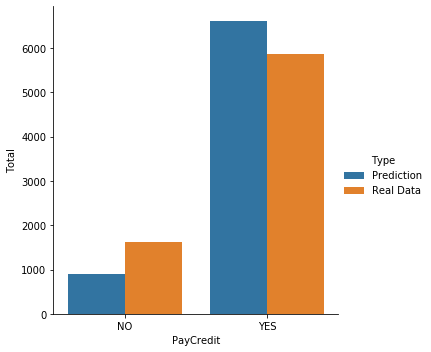

In [153]:
sns.catplot(x="PayCredit", y="Total", hue="Type", kind="bar", data=newDF);

In [ ]:
#tunning other parameters to see if we can improve the performance
rfc = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)
# {'n_estimators': 1600, 'max_features': 'auto', 'max_depth': None}

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [96]:
# Using the suggested  parameters after tuning

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1600, max_features= 'auto')

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
#Model Fitting
rfc_cv_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')

In [98]:
clf.score(X_train,y_train)
# 0.9943111111111111 -Seems to be overfitting

0.9943111111111111

In [61]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Accuracy: 0.8026666666666666 - The accuracy is the same

Accuracy: 0.8026666666666666


In [ ]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

In [ ]:
#The model seems to be overfitting with a score of 0.99 . So I will use the previous parameters trained

In [106]:
# ++++++++++++++++++++++++++++ SECOND MODEL SVM  +++++++++++++++++++++++++++++++++++++++++

#Create a svm Classifier
clfSVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clfSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
clfSVM.score(X_train,y_train)
# 0.7456888888888888

0.7456888888888888

In [ ]:
#SVM  with only one parameter shows an accuracy of 0.75 

In [25]:
#Tuning the SVM model using GridSearchCV

from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.5],  #is the penalty parameter of the error term. 
              'gamma': [0.5], #is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set(overfitting)
              'kernel': ['rbf'] #selects the type of hyperplane used to separate the data (linear, nolinear).
             }  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.5, gamma=0.5, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.5, gamma=0.5, kernel=rbf, score=0.777, total= 1.0min
[CV] C=0.5, gamma=0.5, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ........ C=0.5, gamma=0.5, kernel=rbf, score=0.778, total= 1.4min
[CV] C=0.5, gamma=0.5, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV] ........ C=0.5, gamma=0.5, kernel=rbf, score=0.778, total= 1.1min
[CV] C=0.5, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.5, kernel=rbf, score=0.777, total= 1.1min
[CV] C=0.5, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=0.5, gamma=0.5, kernel=rbf, score=0.778, total= 1.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5], 'gamma': [0.5], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [26]:
grid.score(X_train,y_train)

0.7800888888888889

In [78]:
#Predict the response for test dataset
y_pred = grid.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Accuracy: 0.78

Accuracy: 0.7836


In [79]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       1.00      0.00      0.00      1627

    accuracy                           0.78      7500
   macro avg       0.89      0.50      0.44      7500
weighted avg       0.83      0.78      0.69      7500



In [65]:
# ++++++++++++++++++++++++++++ THIRD MODEL KNN  +++++++++++++++++++++++++++++++++++++++++

knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,
                     weights='uniform')
knn.fit(X_train, y_train) 

knn.score(X_train,y_train)
#0.8112444444444444

0.8112444444444444

In [66]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7457333333333334


In [ ]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

In [82]:
#Tuning Hyperparameters
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

#Tuning result:
#best leaf_size: 1
#best p: 1
#best n_neighbors: 28

Best leaf_size: 1
Best p: 1
Best n_neighbors: 28


In [92]:
knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=1, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=28, 
                     p=1,
                     weights='uniform')
knn.fit(X_train, y_train) 

knn.score(X_train,y_train)
#0.77

0.7792

In [93]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Accuracy: 0.7846666666666666

Accuracy: 0.7846666666666666
